O que deve ser feito

1 - Utilizar 4 algoritmos de aprendizado supervisionado, treinando-os com o conjunto
de treinamento e depois realizando classificação do conjunto de testes para verificar
qual algoritmo apresenta a melhor taxa de reconhecimento. Devem ser utilizados os
seguintes algoritmos:
- Árvores de Decisão
- K-Nearest Neighbor (KNN)
- Support Vector Machine (SVM)
- Rede Neural (usando backpropagation)

In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import tree, neighbors, svm, neural_network
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor
import matplotlib.pyplot as plt
np.random.seed(42)
random.seed(42)

# Dataset

Abalone é um tipo de molusco, que vive agarrado em rochas. Sua carne é um prato
muito apreciado na Ásia. O método clássico muito utilizado na determinação da
idade de um abalone considera o corte de sua concha em cones, pintando e
contando o número de anéis. Porém esse método é muito demorado, logo outras
características do abalone foram levantas e um banco de dados com essas
características foi criado para tentar encontrar um método mais prático para definir a idade do mesmo.

Esse banco de dados, com 4177 exemplos e 8 atributos.
http://archive.ics.uci.edu/ml/datasets/Abalone

In [ ]:
# importando dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
# convertendo variáveis categóricas
enc = LabelEncoder()
X['Sex'] = enc.fit_transform(X['Sex'])
print(X)

      Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140   

<ipython-input-298-02b3ab828044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = enc.fit_transform(X['Sex'])


In [ ]:
# Padronização dos dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# transformando y_train em um array 1d
y = np.ravel(y)

In [ ]:
# separação dos conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def scatter_plot(y_test, y_pred):
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, color='green', alpha=0.5)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
  plt.xlabel('Valores Reais')
  plt.ylabel('Valores Preditos')
  plt.title('Comparação entre Valores Reais e Preditos')
  plt.show()

#Árvores de Decisão

Mean Absolute Error (MAE): 2.1830143540669855
Mean Squared Error (MSE): 9.80023923444976
R^2 Score: 0.09468368805725214


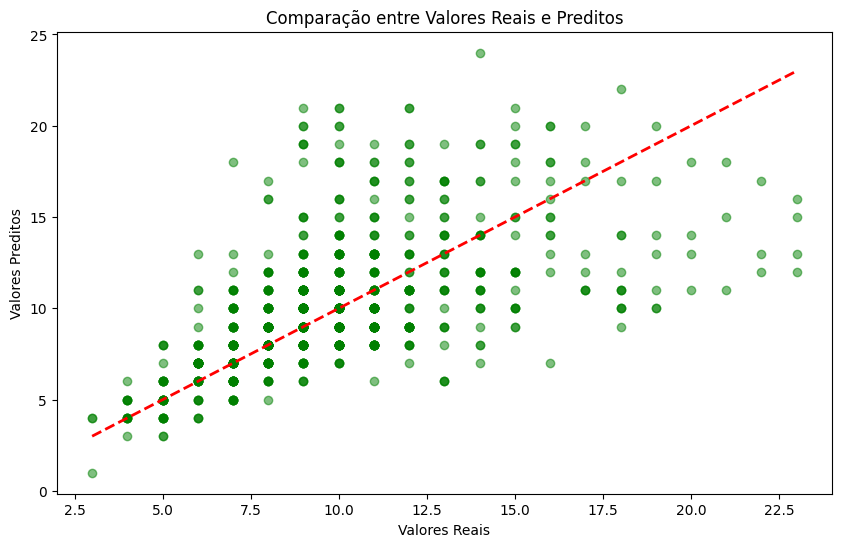

In [ ]:
# treinamento e predição
tree_model = tree.DecisionTreeRegressor(random_state=42)
start_time = time.time()
tree_model.fit(X_train, y_train)
timef = time.time() - start_time
y_pred = tree_model.predict(X_test)

# cálculo de métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# exibir as métricas
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict = {
    'Ávore de decisão': [mae, mse, r2, timef]
}

##Ajuste de Hiperparâmetros

Melhores parâmetros encontrados: {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}
Mean Absolute Error (MAE) após ajuste: 1.6245254516433962
Mean Squared Error (MSE) após ajuste: 5.3628119870044815
R^2 Score após ajuste: 0.5045997292952975


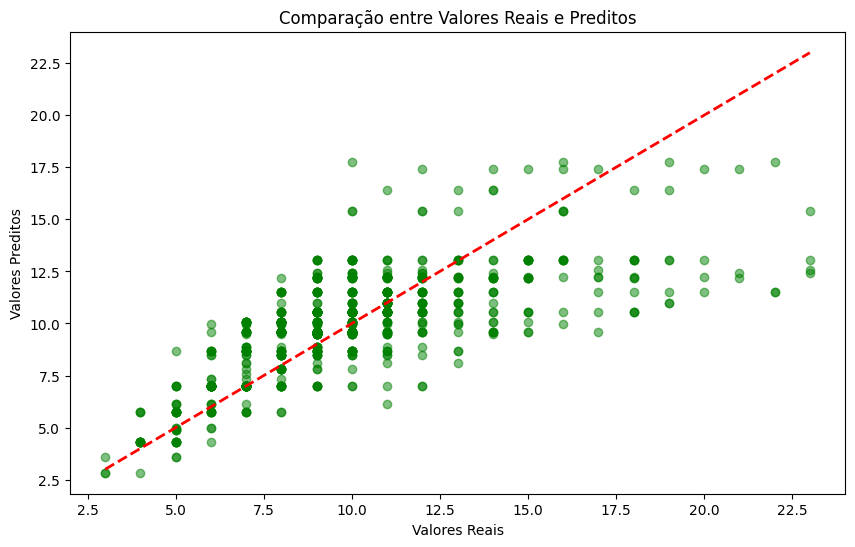

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(estimator=tree.DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

start_time = time.time()
grid_search.fit(X_train, y_train)
timef = time.time() - start_time

print("Melhores parâmetros encontrados:", grid_search.best_params_)

best_tree_model = grid_search.best_estimator_
y_pred_best = best_tree_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Absolute Error (MAE) após ajuste:", mae_best)
print("Mean Squared Error (MSE) após ajuste:", mse_best)
print("R^2 Score após ajuste:", r2_best)

scatter_plot(y_test, y_pred_best)

In [ ]:
metrics_dict['Ávore de decisão tunned'] = [mae_best, mse_best, r2_best, timef]

#K-Nearest Neighbor (KNN)

In [ ]:
# testando o modelo com diferentes k
for k in range(3, 26, 2):
  knn_model = neighbors.KNeighborsRegressor(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)

  # cálculo de métricas
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # exibir as métricas
  print(f'Resultado com {k} vizinhos')
  print("Mean Absolute Error (MAE):", mae)
  print("Mean Squared Error (MSE):", mse)
  print("R^2 Score:", r2)
  print()

Resultado com 3 vizinhos
Mean Absolute Error (MAE): 1.7416267942583732
Mean Squared Error (MSE): 6.240563530037213
R^2 Score: 0.42351570973921127

Resultado com 5 vizinhos
Mean Absolute Error (MAE): 1.6119617224880383
Mean Squared Error (MSE): 5.2306220095693785
R^2 Score: 0.5168110376097586

Resultado com 7 vizinhos
Mean Absolute Error (MAE): 1.6008202323991796
Mean Squared Error (MSE): 5.215408651498876
R^2 Score: 0.5182164013862097

Resultado com 9 vizinhos
Mean Absolute Error (MAE): 1.5873205741626795
Mean Squared Error (MSE): 5.177136865733357
R^2 Score: 0.5217518326253685

Resultado com 11 vizinhos
Mean Absolute Error (MAE): 1.571879077859939
Mean Squared Error (MSE): 5.106538415912057
R^2 Score: 0.5282735028307676

Resultado com 13 vizinhos
Mean Absolute Error (MAE): 1.5637651821862348
Mean Squared Error (MSE): 5.123531326972623
R^2 Score: 0.5267037493581743

Resultado com 15 vizinhos
Mean Absolute Error (MAE): 1.5618819776714516
Mean Squared Error (MSE): 5.111111111111111
R^2 S

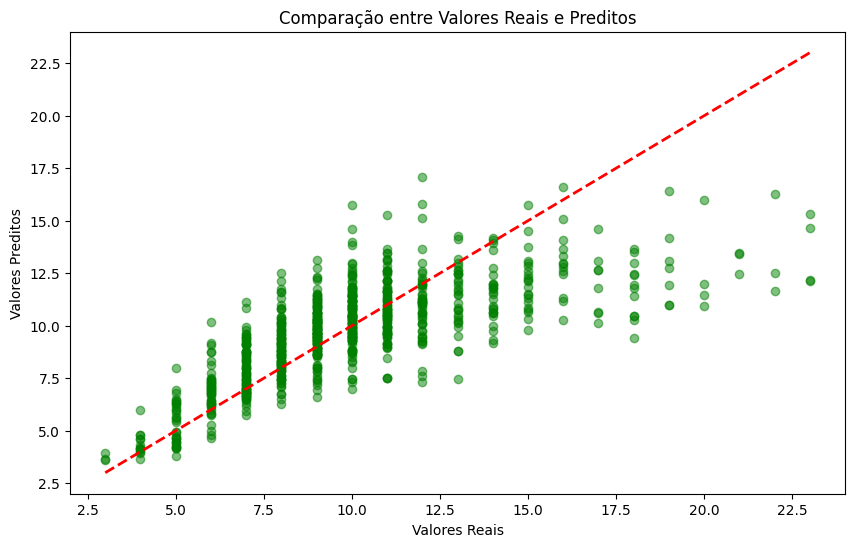

In [ ]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors=15)
start_time = time.time()
knn_model.fit(X_train, y_train)
timef = time.time() - start_time
y_pred = knn_model.predict(X_test)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict['KNN'] = [mae, mse, r2, timef]

##Ajuste de Hiperparâmetros

In [ ]:
# testando o modelo com diferentes métricas
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

for metric in metrics:
    knn_model = neighbors.KNeighborsRegressor(n_neighbors=15, metric=metric)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    # Calcular as métricas de regressão
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Exibir as métricas
    print(f"Resultados para a métrica {metric}:")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R^2 Score:", r2)
    print()

Resultados para a métrica euclidean:
Mean Absolute Error (MAE): 1.5618819776714516
Mean Squared Error (MSE): 5.111111111111111
R^2 Score: 0.5278510911473167

Resultados para a métrica manhattan:
Mean Absolute Error (MAE): 1.5538277511961722
Mean Squared Error (MSE): 5.19903774587985
R^2 Score: 0.5197286958867441

Resultados para a métrica chebyshev:
Mean Absolute Error (MAE): 1.577432216905901
Mean Squared Error (MSE): 5.27079744816587
R^2 Score: 0.5130997527083649

Resultados para a métrica minkowski:
Mean Absolute Error (MAE): 1.5618819776714516
Mean Squared Error (MSE): 5.111111111111111
R^2 Score: 0.5278510911473167



#Support Vector Machine (SVM)

Mean Absolute Error (MAE): 1.5243960560678536
Mean Squared Error (MSE): 4.997554954719112
R^2 Score: 0.538341063712662


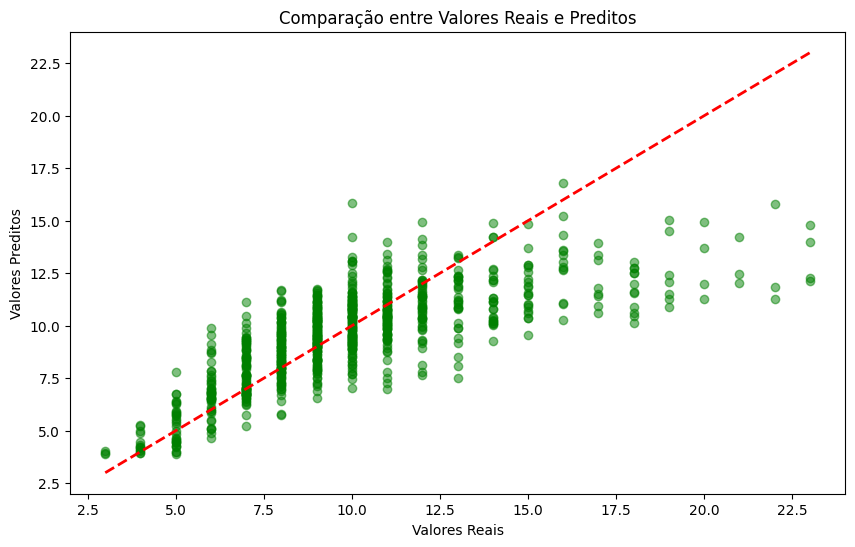

In [ ]:
svm_model = svm.SVR()
start_time = time.time()
svm_model.fit(X_train, y_train)
timef = time.time() - start_time
y_pred = svm_model.predict(X_test)

# cálculo de métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# exibir as métricas
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict['SVM'] = [mae, mse, r2, timef]

##Ajuste de Hiperparâmetros

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.422 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.378 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.310 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.382 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.398 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.463 total time=   0.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.423 total time=   0.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.393 total time=   0.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.437 total time=   0.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.418 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.374 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

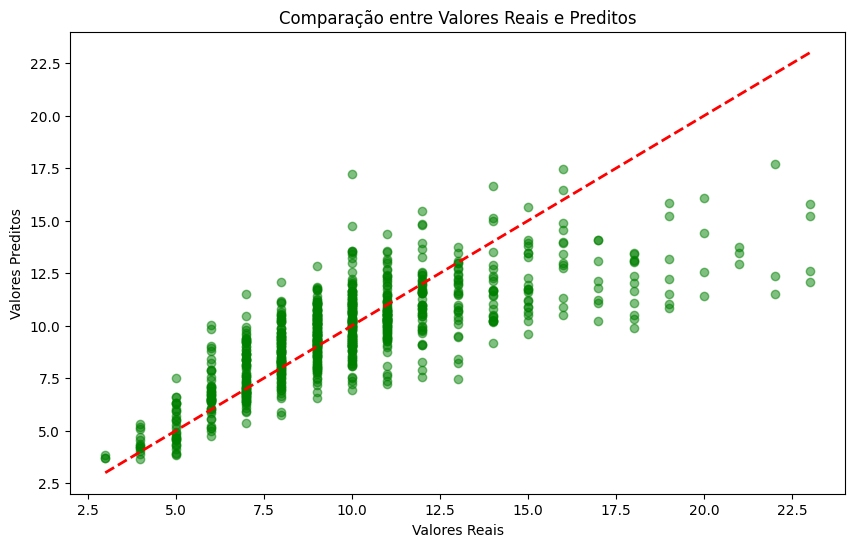

In [ ]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
start_time = time.time()
grid.fit(X_train, y_train)
timef = time.time() - start_time

y_pred = grid.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict['SVM tunned'] = [mae, mse, r2, timef]

##Seleção de Features

In [ ]:
# seleção de features
selector = RFE(LinearRegression(), n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# transformação para incluir apenas as features selecionadas
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

svm_model = svm.SVR()
svm_model.fit(X_train_selected, y_train)

# previsões usando os dados de teste selecionados
y_pred = svm_model.predict(X_test_selected)

# cálculo das métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# exibir as métricas
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 1.5186987384263935
Mean Squared Error (MSE): 4.938862925697424
R^2 Score: 0.5437628549550197


#Rede Neural

Mean Absolute Error (MAE): 1.4990553357938265
Mean Squared Error (MSE): 4.59350767266472
R^2 Score: 0.5756657234979197


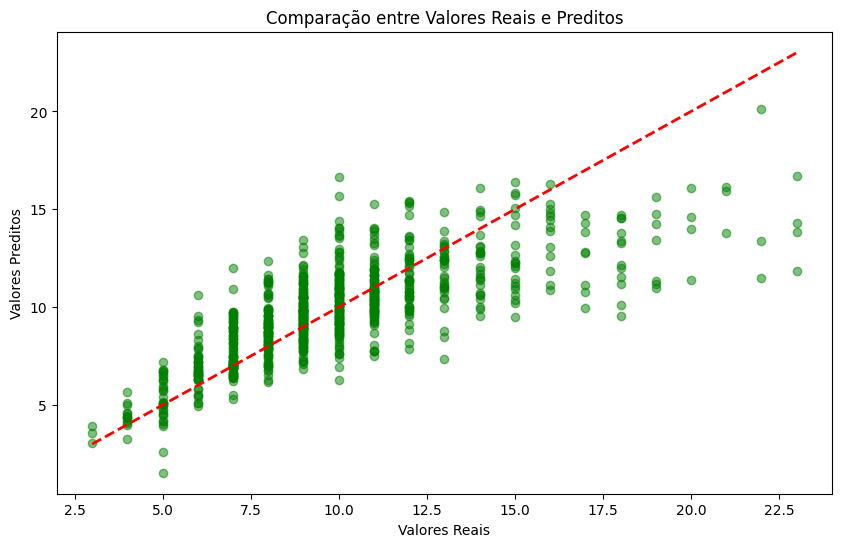

In [ ]:
mlp_model = neural_network.MLPRegressor(hidden_layer_sizes=(100, 100, 50), activation='relu',
                                        solver='adam', random_state=42, learning_rate='adaptive', learning_rate_init=0.001, alpha=0.3)
start_time = time.time()
mlp_model.fit(X_train, y_train)
timef = time.time() - start_time

y_pred = mlp_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict['Rede Neural'] = [mae, mse, r2, timef]

In [ ]:
# param_grid = {
#     'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,100,50)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# grid_search = GridSearchCV(neural_network.MLPRegressor(max_iter=500), param_grid, n_jobs=-1, cv=5)
# grid_search.fit(X_train, y_train)

# y_pred = grid_search.predict(X_test)

# print("Melhores parâmetros encontrados:", grid_search.best_params_)

# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R^2 Score:", r2)

# scatter_plot(y_test, y_pred)


#Ensemble SVM + MLP

Uma abordagem comum para combinar modelos é usar técnicas de ensemble. O VotingRegressor combina as previsões de múltiplos modelos, tomando a média das previsões individuais.

In [ ]:
metrics_dict_ensemble = metrics_dict.copy()

Mean Absolute Error (MAE): 1.478321201495115
Mean Squared Error (MSE): 4.590305238544629
R^2 Score: 0.5759615546279038


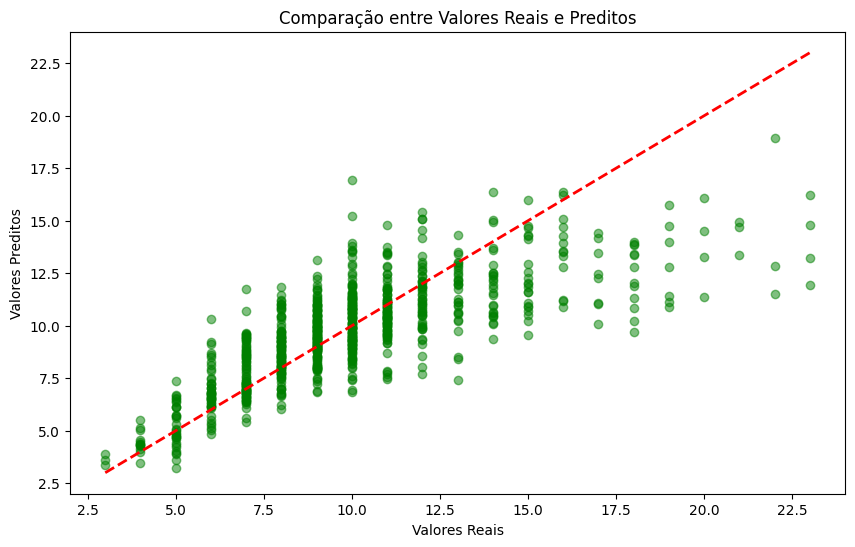

In [ ]:
# Combinando os modelos com VotingRegressor
svm_model = svm.SVR(C=10, gamma=0.1, kernel='rbf')
voting_regressor = VotingRegressor(estimators=[('svm', svm_model), ('mlp', mlp_model)])
voting_regressor.fit(X_train, y_train)

y_pred = voting_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict_ensemble['SVM + MLP - VR'] = [mae, mse, r2, timef]

O StackingRegressor é uma técnica de ensemble que combina as previsões de vários modelos de regressão base para gerar uma previsão final. As previsões feitas pelos modelos base são usadas como entrada para um meta-modelo, também conhecido como modelo de nivelamento. Este meta-modelo é um modelo de regressão adicional treinado com as previsões dos modelos base como características e os valores reais como alvos.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Absolute Error (MAE): 1.4978328152072984
Mean Squared Error (MSE): 4.541728105194604
R^2 Score: 0.5804489625530701


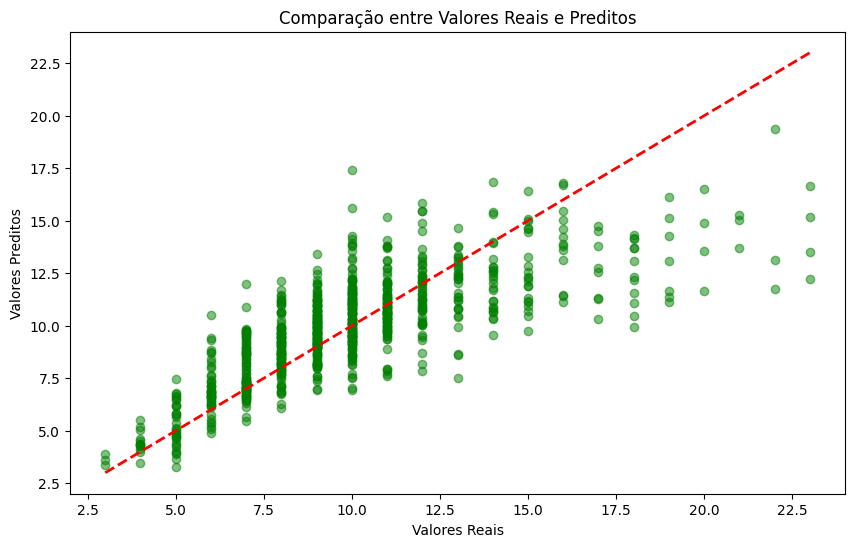

In [ ]:
# Definindo os modelos base
base_models = [
    ('svm', svm_model),
    ('mlp', mlp_model)
]

# Definindo o meta-modelo
meta_model = LinearRegression()

# Construindo o StackingRegressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Treinando o StackingRegressor
stacking_regressor.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = stacking_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict_ensemble['SVM + MLP - SR'] = [mae, mse, r2, timef]

#Random Forest

Mean Absolute Error (MAE): 1.5916746411483256
Mean Squared Error (MSE): 5.094096889952153
R^2 Score: 0.5294228131820258


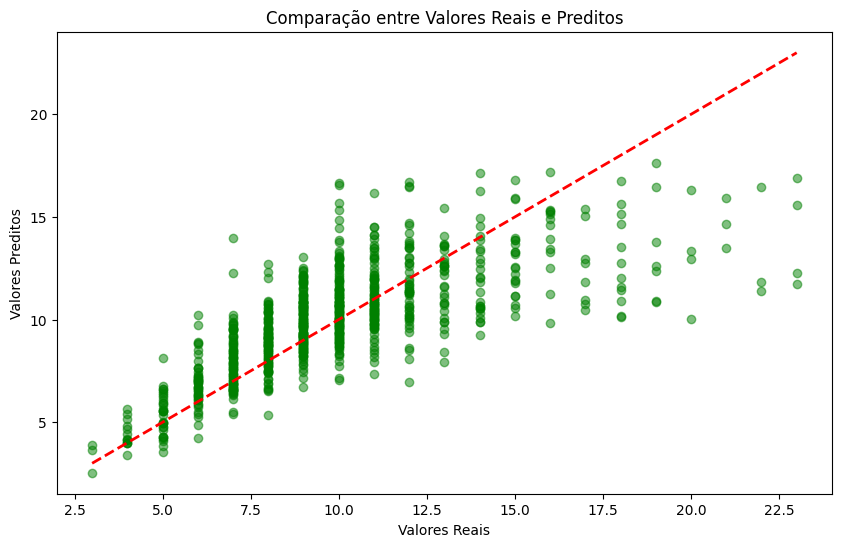

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

scatter_plot(y_test, y_pred)

In [ ]:
metrics_dict_ensemble['Random Forest'] = [mae, mse, r2, timef]

#Desempenho Geral

In [ ]:
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['MAE', 'MSE', 'R^2 Score', 'Tempo de treino'])
metrics_df

,MAE,MSE,R^2 Score,Tempo de treino
Ávore de decisão,2.183014,9.800239,0.094684,0.079723
Ávore de decisão tunned,1.624525,5.362812,0.504600,5.641198
KNN,1.558038,5.156576,0.523651,0.009865
SVM,1.524396,4.997555,0.538341,0.616447
SVM tunned,1.496428,4.759855,0.560299,27.560374
Rede Neural,1.499055,4.593508,0.575666,12.622147


In [ ]:
metrics_ensemble_df = pd.DataFrame.from_dict(metrics_dict_ensemble, orient='index', columns=['MAE', 'MSE', 'R^2 Score', 'Tempo de treino'])
metrics_ensemble_df

,MAE,MSE,R^2 Score,Tempo de treino
Ávore de decisão,2.183014,9.800239,0.094684,0.079723
Ávore de decisão tunned,1.624525,5.362812,0.504600,5.641198
KNN,1.558038,5.156576,0.523651,0.009865
SVM,1.524396,4.997555,0.538341,0.616447
SVM tunned,1.496428,4.759855,0.560299,27.560374
Rede Neural,1.499055,4.593508,0.575666,12.622147
SVM + MLP - VR,1.478321,4.590305,0.575962,12.622147
SVM + MLP - SR,1.497833,4.541728,0.580449,12.622147
Random Forest,1.591675,5.094097,0.529423,12.622147


In [ ]:
def highlight(s):
  is_min = s == s.min()
  if s.name == 'R^2 Score':
    is_min = s == s.max()
  return ['background-color: #33ff33' if v else '' for v in is_min]

metrics_df = metrics_df.style.apply(highlight)
metrics_df

,MAE,MSE,R^2 Score,Tempo de treino
Ávore de decisão,2.183014,9.800239,0.094684,0.079723
Ávore de decisão tunned,1.624525,5.362812,0.504600,5.641198
KNN,1.558038,5.156576,0.523651,0.009865
SVM,1.524396,4.997555,0.538341,0.616447
SVM tunned,1.496428,4.759855,0.560299,27.560374
Rede Neural,1.499055,4.593508,0.575666,12.622147


In [ ]:
metrics_ensemble_df = metrics_ensemble_df.style.apply(highlight)
metrics_ensemble_df

,MAE,MSE,R^2 Score,Tempo de treino
Ávore de decisão,2.183014,9.800239,0.094684,0.079723
Ávore de decisão tunned,1.624525,5.362812,0.504600,5.641198
KNN,1.558038,5.156576,0.523651,0.009865
SVM,1.524396,4.997555,0.538341,0.616447
SVM tunned,1.496428,4.759855,0.560299,27.560374
Rede Neural,1.499055,4.593508,0.575666,12.622147
SVM + MLP - VR,1.478321,4.590305,0.575962,12.622147
SVM + MLP - SR,1.497833,4.541728,0.580449,12.622147
Random Forest,1.591675,5.094097,0.529423,12.622147
